In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../input/train_set.csv', sep='\t')

In [3]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [4]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

下图将句子长度绘制了直方图，可见大部分句子的长度都集中在2000以内。

Text(0.5, 1.0, 'Histogram of char count')

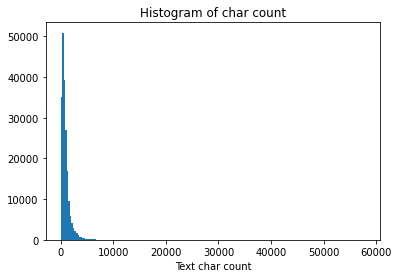

In [5]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title('Histogram of char count')

Text(0.5, 1.0, 'category')

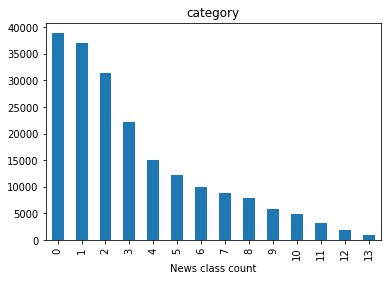

In [6]:
train_df['label'].value_counts().plot(kind='bar')
plt.xlabel('News class count')
plt.title('category')

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

In [7]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d: d[1], reverse=True)

In [8]:
print(len(word_count))

6869


In [9]:
print(word_count[0])

('3750', 7482224)


In [10]:
print(word_count[-1])

('3133', 1)


从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。

In [11]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)

print(word_count[0])
print(word_count[1])
print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

**数据分析结论**

通过上述分析我们可以得出以下结论：  

1. 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；  
2. 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；  
3. 赛题总共包括7000-8000个字符； 

通过数据分析，我们还可以得出以下结论：    

1. 每个新闻平均字符个数较多，可能需要截断；
2. 由于类别不均衡，会严重影响模型的精度；  

1. 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [12]:
import re

In [13]:
# 通过3750、900、648标点符号分割新闻。
train_df['seme_list'] = train_df['text'].apply(lambda x: re.split('3750|900|648', x))
# 对分割后的句子前后去空格，过滤分割后空的字符，计算新闻短句数。
train_df['seme_num'] = train_df['seme_list'].apply(lambda x: len(list(filter(None, [i.strip() for i in x]))))
print(train_df['seme_num'].describe())

count    200000.000000
mean         79.466030
std          85.383165
min           1.000000
25%          28.000000
50%          56.000000
75%         102.000000
max        3393.000000
Name: seme_num, dtype: float64


统计分析得出，每篇新闻平均有79个短句，最少的新闻仅为1个句子，最长的新闻有3393个短句。

2. 统计每类新闻中出现次数最多的字符

In [28]:
# 对每类新闻聚合并拼接
label_pd = train_df.groupby('label')['text'].apply(lambda x: x.str.cat(sep=' ')).reset_index()
# 过滤标点符号
label_pd['text'] = label_pd['text'].apply(lambda x: re.sub('3750 | 3750|900 | 900|648 | 648', '', x))
# 统计每类新闻的相同字符个数
label_pd['word_count'] = label_pd['text'].apply(lambda x: Counter(x.split(' ')))
# 降序排序
label_pd['word_count'] = label_pd['word_count'].apply(lambda x: sorted(x.items(), key=lambda d: d[1], reverse=True))
# 统计每类新闻中出现次数最多的字符
label_pd['word_most'] = label_pd['word_count'].apply(lambda x: x[0])
print(label_pd[['label', 'word_most']])

    label       word_most
0       0  (3370, 501743)
1       1  (3370, 625227)
2       2  (7399, 351630)
3       3  (6122, 187767)
4       4  (4411, 120314)
5       5  (6122, 159073)
6       6  (6248, 193521)
7       7  (3370, 158886)
8       8   (6122, 57282)
9       9   (7328, 46451)
10     10   (3370, 67703)
11     11   (4939, 18574)
12     12   (4464, 51418)
13     13    (4939, 9640)


统计得出，字符3370在`科技`、`股票`、`财经`、`房产`这四类新闻中出现的次数最多。